In [595]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plts
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
# import mysql.connector as sql
import sqlite3

from sqlalchemy import create_engine

In [596]:
data_credit_score = pd.read_csv('./Data/credit_profiles.csv')
data_credit_score.head(4)

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
0,1,749,0.585171,19571.0,0.0,40000.0
1,2,587,0.107928,161644.0,2.0,1250.0
2,3,544,0.854807,513.0,4.0,1000.0
3,4,504,0.336938,224.0,2.0,1000.0


In [597]:
data_credit_score.shape

(1004, 6)

In [598]:
#### Check for duplicated values,
##### check for nulls and see the best way to treat the nulls
##### check for outliars based on the BUSINESS or Stat Formulars


### Step 1 Checkinf for duplicated values,

In [599]:
duplicates = data_credit_score.cust_id.duplicated().sum()
print("Number of duplicate rows:", duplicates)

Number of duplicate rows: 4


In [600]:
duplicates = data_credit_score.cust_id.duplicated().sum()
print("Number of duplicate rows:", duplicates)

Number of duplicate rows: 4


In [601]:
duplicate_rows = data_credit_score[data_credit_score.cust_id.duplicated()]
pd.DataFrame(duplicate_rows)



,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
517,517,308,0.113860,33.0,3.0,500.0
570,569,344,0.112599,37.0,0.0,500.0
608,606,734,0.193418,4392.0,1.0,40000.0
665,662,442,0.856039,266.0,2.0,500.0


In [602]:
duplicate_rows2 = data_credit_score[data_credit_score.cust_id.duplicated(keep=False)]
pd.DataFrame(duplicate_rows2)

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
516,517,308,NaN,NaN,NaN,NaN
517,517,308,0.113860,33.0,3.0,500.0
569,569,344,NaN,NaN,NaN,NaN
570,569,344,0.112599,37.0,0.0,500.0
607,606,734,NaN,NaN,NaN,NaN
608,606,734,0.193418,4392.0,1.0,40000.0
664,662,442,NaN,NaN,NaN,NaN
665,662,442,0.856039,266.0,2.0,500.0


In [603]:
data_credit_score.credit_score.isnull().sum()

0

##### We drop the first row since they have NaN values

In [604]:
data_clean_credit_score = data_credit_score.drop_duplicates(subset="cust_id", keep="last")
data_clean_credit_score.shape

(1000, 6)

In [605]:
data_credit_score.shape[0],data_clean_credit_score.shape[0]

(1004, 1000)

In [606]:
data_credit_score.cust_id.duplicated().sum(),data_clean_credit_score.cust_id.duplicated().sum()

(4, 0)

##### Now Duplicatdes are removed lets check for Null Values

### Step 2 check for nulls and see the best way to treat the nulls

In [607]:
data_clean_credit_score.isnull().sum()

cust_id                            0
credit_score                       0
credit_utilisation                 0
outstanding_debt                   0
credit_inquiries_last_6_months     0
credit_limit                      65
dtype: int64

In [608]:
correlation_matrix = data_clean_credit_score.corr()
correlation_matrix

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
cust_id,1.000000,0.021562,0.000024,-0.024993,0.029721,0.022274
credit_score,0.021562,1.000000,-0.070445,0.306026,-0.001226,0.844279
credit_utilisation,0.000024,-0.070445,1.000000,0.046540,-0.013952,-0.084046
outstanding_debt,-0.024993,0.306026,0.046540,1.000000,0.034089,0.361906
credit_inquiries_last_6_months,0.029721,-0.001226,-0.013952,0.034089,1.000000,0.024669
credit_limit,0.022274,0.844279,-0.084046,0.361906,0.024669,1.000000


##### Generally, a correlation above 0.6 (or below -0.6) is considered a strong correlation
##### That being said credit_limit has a corrolation with  credit_score

In [609]:
data_clean_credit_score.credit_score.value_counts(dropna=False)

799    8
771    8
736    8
769    7
766    7
      ..
393    1
608    1
692    1
407    1
564    1
Name: credit_score, Length: 419, dtype: int64

In [610]:
data_clean_credit_score.credit_limit.value_counts(dropna=False)

500.0      229
60000.0    186
40000.0    137
1500.0     100
1000.0      90
750.0       76
1250.0      75
NaN         65
20000.0     42
Name: credit_limit, dtype: int64

In [611]:
data_clean_credit_score.credit_score

0       749
1       587
2       544
3       504
4       708
       ... 
999     564
1000    774
1001    529
1002    725
1003    775
Name: credit_score, Length: 1000, dtype: int64

In [612]:
pd.DataFrame(data_clean_credit_score.credit_limit.value_counts(dropna=False))

,credit_limit
500.0,229
60000.0,186
40000.0,137
1500.0,100
1000.0,90
750.0,76
1250.0,75
NaN,65
20000.0,42


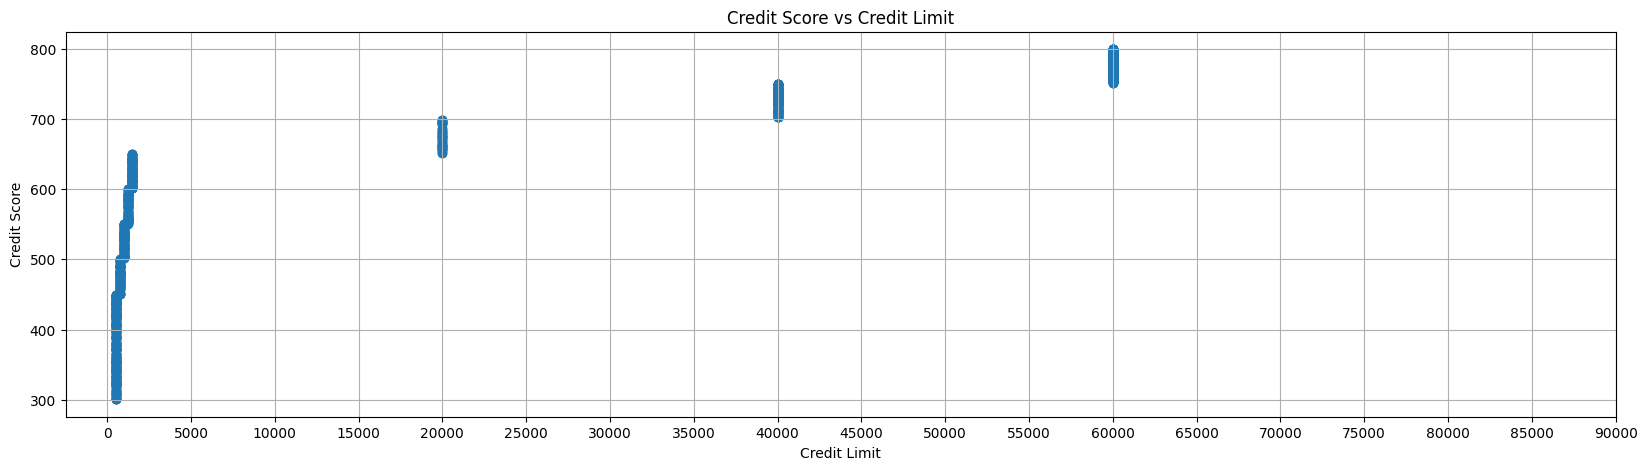

In [613]:
plt.figure(figsize=(20,5))
plt.scatter(data_clean_credit_score.credit_limit,data_clean_credit_score.credit_score)
plt.title('Credit Score vs Credit Limit')
plt.xlabel('Credit Limit')
plt.ylabel('Credit Score')
plt.xticks(range(0,90001,5000))
plt.grid(True)

plt.show()

##### Since there is a corrolation between credit score and credit history we create a range for the credit score
##### If credit score is between 650-700 limit is 20000 and score is between 700 and 750 score is 40000

##### Next we create the Credit Score Range

In [614]:
bin_ranges = [299,450,500,550,600,650,700,750,800]
bin_labels = [f'{start}-{end-1}' for start,end in zip(bin_ranges, bin_ranges[1:])]
bin_labels

['299-449',
 '450-499',
 '500-549',
 '550-599',
 '600-649',
 '650-699',
 '700-749',
 '750-799']

In [615]:
bin_ranges = [299,450,500,550,600,650,700,750,800]
bin_labels = [f'{start}-{end-1}' for start,end in zip(bin_ranges, bin_ranges[1:])]
data_clean_credit_score['credit_score_range'] = pd.cut(data_clean_credit_score['credit_score'],bins=bin_ranges,labels=bin_labels)
data_clean_credit_score.head(5)

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
0,1,749,0.585171,19571.0,0.0,40000.0,700-749
1,2,587,0.107928,161644.0,2.0,1250.0,550-599
2,3,544,0.854807,513.0,4.0,1000.0,500-549
3,4,504,0.336938,224.0,2.0,1000.0,500-549
4,5,708,0.586151,18090.0,2.0,40000.0,700-749


In [616]:
data_clean_credit_score.shape

(1000, 7)

In [617]:
pd.DataFrame(data_clean_credit_score.credit_limit[data_clean_credit_score.credit_score_range=="700-749"])

,credit_limit
0,40000.0
4,40000.0
6,40000.0
16,40000.0
27,40000.0
...,...
969,40000.0
970,40000.0
991,40000.0
994,40000.0


In [618]:
pd.DataFrame(data_clean_credit_score.credit_limit[data_clean_credit_score.credit_score_range=="700-749"]).value_counts(dropna=False)

credit_limit
40000.0         137
NaN              11
dtype: int64

In [619]:
pd.DataFrame(data_clean_credit_score.credit_limit[data_clean_credit_score.credit_score_range=="550-599"]).value_counts(dropna=False)

credit_limit
1250.0          75
NaN              3
dtype: int64

In [620]:
pd.DataFrame(data_clean_credit_score.credit_limit[data_clean_credit_score.credit_score_range=="500-549"]).value_counts(dropna=False)

credit_limit
1000.0          90
NaN              7
dtype: int64

##### We can see each credit score range has a credit score limit which occurs the most, hence we use the Mode.

In [621]:
meanDF = data_clean_credit_score.groupby('credit_score_range')["credit_limit"].mean().reset_index()
meanDF


,credit_score_range,credit_limit
0,299-449,500.0
1,450-499,750.0
2,500-549,1000.0
3,550-599,1250.0
4,600-649,1500.0
5,650-699,20000.0
6,700-749,40000.0
7,750-799,60000.0


In [622]:
meanDF2 = pd.DataFrame(data_clean_credit_score.groupby('credit_score_range')["credit_limit"].mean())
meanDF2


,credit_limit
credit_score_range,
299-449,500.0
450-499,750.0
500-549,1000.0
550-599,1250.0
600-649,1500.0
650-699,20000.0
700-749,40000.0
750-799,60000.0


In [623]:
modeDF = data_clean_credit_score.groupby('credit_score_range')["credit_limit"].agg(lambda x: x.mode().iloc[0]).reset_index()
modeDF

,credit_score_range,credit_limit
0,299-449,500.0
1,450-499,750.0
2,500-549,1000.0
3,550-599,1250.0
4,600-649,1500.0
5,650-699,20000.0
6,700-749,40000.0
7,750-799,60000.0


In [624]:
modeDF.shape

(8, 2)

In [625]:
data_clean_credit_score.credit_score_range.nunique()

8

In [626]:
data_clean_credit_score.shape

(1000, 7)

In [627]:
data_clean_credit_score.credit_score_range.unique().value_counts(dropna=False).reset_index()

,index,0
0,299-449,1
1,450-499,1
2,500-549,1
3,550-599,1
4,600-649,1
5,650-699,1
6,700-749,1
7,750-799,1


In [628]:
data_clean_credit_score.credit_score_range.unique().value_counts(dropna=False).reset_index()

,index,0
0,299-449,1
1,450-499,1
2,500-549,1
3,550-599,1
4,600-649,1
5,650-699,1
6,700-749,1
7,750-799,1


In [629]:
modeDF.credit_score_range.unique().value_counts(dropna=False).reset_index()

,index,0
0,299-449,1
1,450-499,1
2,500-549,1
3,550-599,1
4,600-649,1
5,650-699,1
6,700-749,1
7,750-799,1


In [630]:
pd.DataFrame(modeDF.credit_score_range.unique().value_counts(dropna=False))

,0
299-449,1
450-499,1
500-549,1
550-599,1
600-649,1
650-699,1
700-749,1
750-799,1


##### That being said.... The Credit Score range has the same number of unique values in the column. 
##### this means we can join the columns to create a  new credit limit row without nulls

In [631]:
data_clean_credit_score2 = pd.merge(data_clean_credit_score,modeDF, on="credit_score_range", suffixes = ("", "_mode"))
data_clean_credit_score2

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
0,1,749,0.585171,19571.0,0.0,40000.0,700-749,40000.0
1,5,708,0.586151,18090.0,2.0,40000.0,700-749,40000.0
2,7,747,0.523965,15544.0,4.0,40000.0,700-749,40000.0
3,17,702,0.894423,18444.0,0.0,40000.0,700-749,40000.0
4,28,729,0.149748,3453.0,2.0,40000.0,700-749,40000.0
...,...,...,...,...,...,...,...,...
995,985,770,0.628088,33405.0,2.0,60000.0,750-799,60000.0
996,990,772,0.259958,11937.0,2.0,60000.0,750-799,60000.0
997,993,782,0.477170,20305.0,2.0,60000.0,750-799,60000.0
998,997,774,0.465462,17139.0,0.0,60000.0,750-799,60000.0


In [632]:
####### Need to check why we have 999 rows

In [633]:
data_clean_credit_score2.shape

(1000, 8)

In [634]:
data_clean_credit_score2.cust_id.nunique()

1000

In [635]:
data_clean_credit_score2[data_clean_credit_score2.credit_limit.isnull()].sample(3)

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
636,909,479,0.487555,320.0,3.0,NaN,450-499,750.0
873,400,754,0.884299,32031.0,2.0,NaN,750-799,60000.0
52,352,736,0.367879,9916.0,2.0,NaN,700-749,40000.0


In [636]:
data_clean_credit_score2[data_clean_credit_score2.credit_limit_mode.isnull()].head(4)

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode


In [637]:
data_clean_credit_score2[data_clean_credit_score2.credit_limit.isnull()].head(3)

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
9,65,734,0.473715,13631.0,0.0,NaN,700-749,40000.0
11,84,733,0.525567,16663.0,1.0,NaN,700-749,40000.0
21,160,709,0.759795,18244.0,0.0,NaN,700-749,40000.0


##### We fill the credit limit NA values with values from the credit limit mode

In [638]:
data_clean_credit_score2['credit_limit'].fillna(data_clean_credit_score2['credit_limit_mode'],inplace=True)

In [639]:
data_clean_credit_score2[data_clean_credit_score2.credit_limit.isnull()].head(3)

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode


### Check for outliars based on the BUSINESS or Stat Formulars

In [640]:
data_clean_credit_score2.describe()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_limit_mode
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,589.182000,0.498950,9683.597000,1.955000,19733.500000,19733.500000
std,288.819436,152.284929,0.233139,25255.893671,1.414559,24717.629112,24717.629112
min,1.000000,300.000000,0.103761,33.000000,0.000000,500.000000,500.000000
25%,250.750000,460.000000,0.293917,221.000000,1.000000,750.000000,750.000000
50%,500.500000,601.500000,0.487422,550.000000,2.000000,1500.000000,1500.000000
75%,750.250000,738.000000,0.697829,11819.500000,3.000000,40000.000000,40000.000000
max,1000.000000,799.000000,0.899648,209901.000000,4.000000,60000.000000,60000.000000


In [641]:
data_clean_credit_score2.shape

(1000, 8)

In [642]:
data_clean_credit_score2.head(5)

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
0,1,749,0.585171,19571.0,0.0,40000.0,700-749,40000.0
1,5,708,0.586151,18090.0,2.0,40000.0,700-749,40000.0
2,7,747,0.523965,15544.0,4.0,40000.0,700-749,40000.0
3,17,702,0.894423,18444.0,0.0,40000.0,700-749,40000.0
4,28,729,0.149748,3453.0,2.0,40000.0,700-749,40000.0


In [643]:
data_clean_credit_score2.describe()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_limit_mode
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,589.182000,0.498950,9683.597000,1.955000,19733.500000,19733.500000
std,288.819436,152.284929,0.233139,25255.893671,1.414559,24717.629112,24717.629112
min,1.000000,300.000000,0.103761,33.000000,0.000000,500.000000,500.000000
25%,250.750000,460.000000,0.293917,221.000000,1.000000,750.000000,750.000000
50%,500.500000,601.500000,0.487422,550.000000,2.000000,1500.000000,1500.000000
75%,750.250000,738.000000,0.697829,11819.500000,3.000000,40000.000000,40000.000000
max,1000.000000,799.000000,0.899648,209901.000000,4.000000,60000.000000,60000.000000


##### Looking at this distribution we can see the outstanding_debt has a large value of 209,901 debt on a 60,000 limit card so this means we have some outliars

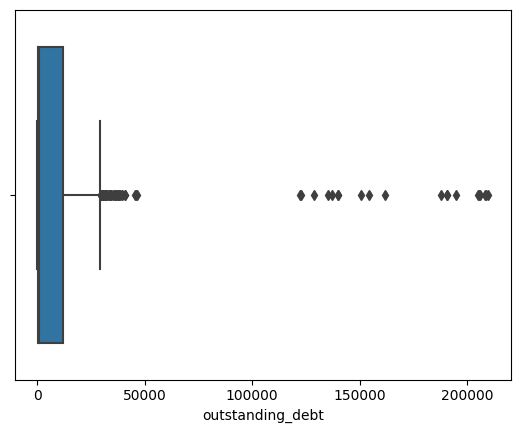

In [644]:
sns.boxplot(x=data_clean_credit_score2.outstanding_debt)
plt.show()

In [645]:
meanCredit_score = data_clean_credit_score2.outstanding_debt.mean()
meanCredit_score

9683.597

In [646]:
stdCredit_score = data_clean_credit_score2.outstanding_debt.std()
stdCredit_score

25255.89367062058

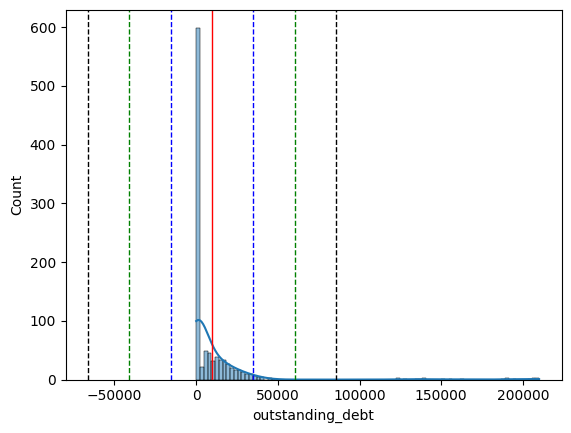

In [647]:
sns.histplot(data_clean_credit_score2.outstanding_debt, kde= True)
plt.axvline(meanCredit_score, color='r',linestyle = 'solid',linewidth =1)


plt.axvline(meanCredit_score + stdCredit_score, color='b',linestyle = 'dashed', linewidth =1)
plt.axvline(meanCredit_score - stdCredit_score, color='b',linestyle = 'dashed', linewidth =1)


plt.axvline(meanCredit_score + 2* stdCredit_score, color='g',linestyle = 'dashed', linewidth =1)
plt.axvline(meanCredit_score - 2* stdCredit_score, color='g',linestyle = 'dashed', linewidth =1)



plt.axvline(meanCredit_score + 3* stdCredit_score, color='black',linestyle = 'dashed', linewidth =1)
plt.axvline(meanCredit_score - 3* stdCredit_score, color='black',linestyle = 'dashed', linewidth =1)




##### As per Business Knowledge Debt can not be more than Credi Limit so thats how we find the outliars

In [653]:
outliars = data_clean_credit_score2[data_clean_credit_score2.credit_limit < data_clean_credit_score2.outstanding_debt]
outliars

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
6,39,734,0.573023,122758.0,3.0,40000.0,700-749,40000.0
13,94,737,0.739948,137058.0,2.0,40000.0,700-749,40000.0
38,272,703,0.446886,154568.0,1.0,40000.0,700-749,40000.0
44,302,722,0.608076,122402.0,4.0,40000.0,700-749,40000.0
105,726,737,0.136048,205404.0,4.0,40000.0,700-749,40000.0
148,2,587,0.107928,161644.0,2.0,1250.0,550-599,1250.0
369,205,303,0.364360,187849.0,0.0,500.0,299-449,500.0
412,351,320,0.285081,150860.0,0.0,500.0,299-449,500.0
482,637,420,0.323984,140063.0,4.0,500.0,299-449,500.0
614,647,498,0.658087,128818.0,3.0,750.0,450-499,750.0


In [658]:
data_clean_credit_score2.loc[data_clean_credit_score2.credit_limit < data_clean_credit_score2.outstanding_debt, 'outstanding_debt'] = data_clean_credit_score2['credit_limit']

In [659]:
outliars = data_clean_credit_score2[data_clean_credit_score2.credit_limit < data_clean_credit_score2.outstanding_debt]
outliars

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode


In [660]:
data_clean_credit_score2.describe()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_limit_mode
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,589.182000,0.498950,6850.084000,1.955000,19733.500000,19733.500000
std,288.819436,152.284929,0.233139,10683.473561,1.414559,24717.629112,24717.629112
min,1.000000,300.000000,0.103761,33.000000,0.000000,500.000000,500.000000
25%,250.750000,460.000000,0.293917,221.000000,1.000000,750.000000,750.000000
50%,500.500000,601.500000,0.487422,541.500000,2.000000,1500.000000,1500.000000
75%,750.250000,738.000000,0.697829,10924.500000,3.000000,40000.000000,40000.000000
max,1000.000000,799.000000,0.899648,60000.000000,4.000000,60000.000000,60000.000000


In [ ]:
debugger

NameError: name 'debugger' is not defined

##### Fixin bugs and making investigations on missing row

In [ ]:
# median_age_by_occupation = data_clean_credit_score3.groupby('occupation')['age'].median()
# pd.DataFrame(median_age_by_occupation)

In [ ]:
meanDF2 = pd.DataFrame(data_clean_credit_score.groupby('credit_score_range')["credit_limit"].mean())
meanDF2


In [ ]:
data_clean_credit_score[data_clean_credit_score.credit_score_range.isnull()]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
680,677,300,0.785509,341.0,1.0,NaN,NaN


In [ ]:
data_clean_credit_score2[data_clean_credit_score2.credit_score_range.isnull()]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode


##### This shows the Custi ID 677 was ommited

In [ ]:
data_clean_credit_score2[data_clean_credit_score2.cust_id == 677]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode


In [ ]:
data_clean_credit_score2[data_clean_credit_score2.cust_id == 676]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
492,676,319,0.324482,102.0,0.0,500.0,300-449,500.0


In [ ]:
data_clean_credit_score2[data_clean_credit_score2.credit_score == 300]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode


In [ ]:
# for index, row in outliarsData1.iterrows():
#   data_customers2.at[index,'age'] = median_age_by_occupation[row['occupation']]

In [ ]:
# for index, row in outliarsData1.iterrows():
#   data_customers2.at[index,'age'] = median_age_by_occupation[row['occupation']]

In [ ]:
# data_clean_credit_score3 = data_clean_credit_score.copy()

In [ ]:
# median_age_by_occupation = data_clean_credit_score3.groupby('occupation')['age'].median()
# pd.DataFrame(median_age_by_occupation)

In [ ]:
# for index, row in outliarsData1.iterrows():
#   data_customers2.at[index,'age'] = median_age_by_occupation[row['occupation']]

In [ ]:
data_credit_score.cust_id.nunique()

1000

In [ ]:
data_credit_score.shape

(1004, 6)